# Análisis por lógica difusa

Acá se hace una prueba para ver cómo se obtiene un solo valor de fuerza usando la lógica difusa.
El ejemplo comienza en el título "Evaluar reglas"

## Importaciones

In [195]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import product #Usado para crear las posibles combinaciones de reglas


## Conjuntos Borrosos

### Función

In [196]:

# La función particiones_borrosas calcula la membresía para cada conjunto
# Estas particiones borrosas tienen un 50% de solapamiento
def particiones_borrosas(valor, picos, ancho):
    n_particiones = 5 #Cantidad de particiones borrosas
    membresia = []
    
    for i in range(n_particiones):
        if valor <= picos[i] - ancho or valor >= picos[i] + ancho:
            membresia.append(0)
        elif picos[i] - ancho <= valor <= picos[i]:
            membresia.append((valor - (picos[i] - ancho)) / ancho)
        elif picos[i] <= valor <= picos[i] + ancho:
            membresia.append((picos[i] + ancho - valor) / ancho)
        else:
            membresia.append(1)
    
    return membresia

### Variable de entrada: ángulo

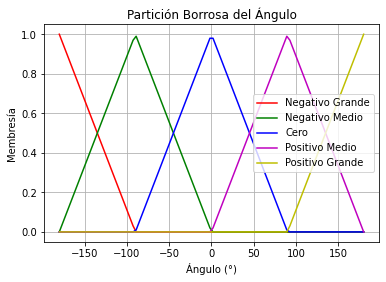

In [197]:
n=100 #Cantidad de puntos

angulo_max = 180
angulo_min = -angulo_max

picos_angulos = [angulo_min, angulo_min/2, 0, angulo_max/2, angulo_max]
ancho_angulos = 90

# Generar datos de ángulo entre -180° y 180°
angulos = np.linspace(angulo_min, angulo_max, n)

# Calcular la membresía para cada ángulo
membresia_angulos = [particiones_borrosas(angulo, picos_angulos, ancho_angulos) for angulo in angulos]

# Graficar los conjuntos borrosos
conjuntos = ['Negativo Grande', 'Negativo Medio', 'Cero', 'Positivo Medio', 'Positivo Grande']
colores = ['r', 'g', 'b', 'm', 'y']

for i in range(len(conjuntos)):
    plt.plot(angulos, [m[i] for m in membresia_angulos], label=conjuntos[i], color=colores[i])

plt.xlabel('Ángulo (°)')
plt.ylabel('Membresía')
plt.title('Partición Borrosa del Ángulo')
plt.legend()
plt.grid(True)
plt.show()


### Variable de entrada: velocidad angular

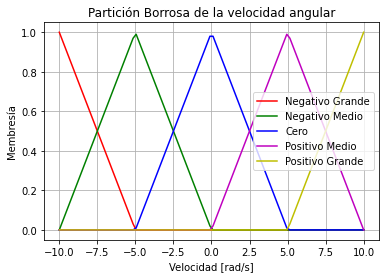

In [198]:
v_max = 10
v_min = -v_max
picos_v = [v_min, v_min/2, 0, v_max/2, v_max]
ancho_v = 5

# Datos de fuerzas entre -10 y 10
velocidades = np.linspace(v_min, v_max, n)

#Calcular membresía para cada velocidad
membresia_velocidades = [particiones_borrosas(velocidad, picos_v, ancho_v) for velocidad in velocidades]

# Graficar los conjuntos borrosos
conjuntos = ['Negativo Grande', 'Negativo Medio', 'Cero', 'Positivo Medio', 'Positivo Grande']
colores = ['r', 'g', 'b', 'm', 'y']

for i in range(len(conjuntos)):
    plt.plot(velocidades, [m[i] for m in membresia_velocidades], label=conjuntos[i], color=colores[i])

plt.xlabel('Velocidad [rad/s]')
plt.ylabel('Membresía')
plt.title('Partición Borrosa de la velocidad angular')
plt.legend()
plt.grid(True)
plt.show()

### Variable de salida: fuerza

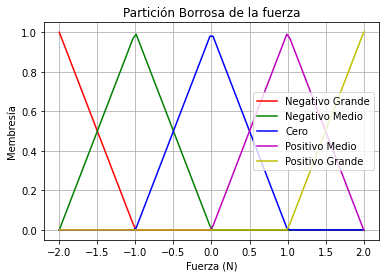

In [199]:
f_max = 2
f_min = -f_max

picos_f = [f_min, f_min/2, 0, f_max/2, f_max]
ancho_f = 1

# Datos de fuerzas entre -2 y 2
fuerzas = np.linspace(f_min, f_max, n)

#Calcular membresía para cada fuerza
membresia_fuerzas = [particiones_borrosas(fuerza, picos_f, ancho_f) for fuerza in fuerzas]

# Graficar los conjuntos borrosos
conjuntos = ['Negativo Grande', 'Negativo Medio', 'Cero', 'Positivo Medio', 'Positivo Grande']
colores = ['r', 'g', 'b', 'm', 'y']

for i in range(len(conjuntos)):
    plt.plot(fuerzas, [m[i] for m in membresia_fuerzas], label=conjuntos[i], color=colores[i])

plt.xlabel('Fuerza (N)')
plt.ylabel('Membresía')
plt.title('Partición Borrosa de la fuerza')
plt.legend()
plt.grid(True)
plt.show()

## Valores interpolados

He establecido una subdivisión de n elementos en cada membresía (o sea que cada membresía tiene n elementos). Si tengo un ángulo de 45°, por ejemplo, necesito convertir este valor a un índice correspondiente sabiendo que los ángulos van de -180° a 180° y que los índices van de 0 a 99.

In [200]:
def interpolar_valor(valor, val_min, val_max, n):
    rango_origen = val_max - (val_min)  # Rango total del valor de origen (-180 a 180)
    rango_destino = n-1  # Rango total del valor de destino (0 a 99)

    # Calculamos la fracción del valor de origen
    fraccion = (valor - (val_min)) / rango_origen

    # Aplicamos la interpolación lineal
    valor_interpolado = fraccion * rango_destino

    # Redondeamos el resultado y lo convertimos a entero
    valor_interpolado = int(round(valor_interpolado))

    # Aseguramos que el valor interpolado esté dentro del rango de destino (0 a n-1)
    valor_interpolado = max(0, min(n-1, valor_interpolado))

    return valor_interpolado

def obtener_valor_minimo(lista):
    valores_sin_cero = [valor for valor in lista if valor != 0]
    valor_minimo = min(valores_sin_cero)
    return valor_minimo


In [201]:
''' Ejemplo ángulo de 0° '''

angulo_entrada = 0

#Lo convierto el ángulo a un numero entre 0 y 100 para encontrar a cual value_member pertenece
angulo_entrada_interpolado = interpolar_valor(angulo_entrada, -180, 180, n)

#Vemos la membrecía del ángulo interpolado 
print(membresia_angulos[angulo_entrada_interpolado])

'''Vemos que el resultado tiene sentido ya que casi el 100% pertenece al conjunto Cero'''

[0, 0, 0.9797979797979799, 0.020202020202020145, 0]


'Vemos que el resultado tiene sentido ya que casi el 100% pertenece al conjunto Cero'

In [202]:
''' Ejemplo ángulo 180° '''

angulo_entrada = 180

#Lo convierto el ángulo a un numero entre 0 y 100 para encontrar a cual value_member pertenece
angulo_entrada_interpolado = interpolar_valor(angulo_entrada, -180, 180, n)

#Vemos la membrecía del ángulo interpolado 
print(membresia_angulos[angulo_entrada_interpolado])

'''Vemos que el resultado tiene sentido ya que el 100% pertenece al conjunto Positivo Alto'''

[0, 0, 0, 0, 1.0]


'Vemos que el resultado tiene sentido ya que el 100% pertenece al conjunto Positivo Alto'

In [203]:
''' Ejemplo ángulo 45° '''

angulo_entrada = 45

#Lo convierto el ángulo a un numero entre 0 y 100 para encontrar a cual value_member pertenece
angulo_entrada_interpolado = interpolar_valor(angulo_entrada, -180, 180, n)

#Vemos la membrecía del ángulo interpolado 
print(membresia_angulos[angulo_entrada_interpolado])

'''En este caso, vemos que pertenece 49,5% al conjunto Cero y 50.5% al conjunto Positivo Medio '''

[0, 0, 0.49494949494949514, 0.5050505050505049, 0]


'En este caso, vemos que pertenece 49,5% al conjunto Cero y 50.5% al conjunto Positivo Medio '

## Reglas

In [204]:
def evaluar_regla(regla, angulo, velocidad):  # Función para evaluar una regla
    if regla["angulo"] == angulo and regla["v"] == velocidad:
        return regla["fuerza"]
    else:
        return None

In [205]:
'''Defino las reglas a usar en un diccionario'''

reglas = {
    1: {"angulo": "Negativo Grande",    "v": "Negativo Grande",     "fuerza": "Negativo Grande"},
    2: {"angulo": "Negativo Grande",    "v": "Negativo Medio",      "fuerza": "Negativo Grande"},
    3: {"angulo": "Negativo Grande",    "v": "Cero",                "fuerza": "Negativo Medio"},
    4: {"angulo": "Negativo Grande",    "v": "Positivo Medio",      "fuerza": "Negativo Medio"},
    5: {"angulo": "Negativo Grande",    "v": "Positivo Grande",     "fuerza": "Cero"},

    6: {"angulo": "Negativo Medio",     "v": "Negativo Grande",     "fuerza": "Negativo Grande"},
    7: {"angulo": "Negativo Medio",     "v": "Negativo Medio",      "fuerza": "Negativo Grande"},
    8: {"angulo": "Negativo Medio",     "v": "Cero",                "fuerza": "Negativo Medio"},
    9: {"angulo": "Negativo Medio",     "v": "Positivo Medio",      "fuerza": "Cero"},
    10: {"angulo": "Negativo Medio",    "v": "Positivo Grande",     "fuerza": "Cero"},

    11: {"angulo": "Cero",              "v": "Negativo Grande",     "fuerza": "Negativo Grande"},
    12: {"angulo": "Cero",              "v": "Negativo Medio",      "fuerza": "Negativo Medio"},
    13: {"angulo": "Cero",              "v": "Cero",                "fuerza": "Cero"},
    14: {"angulo": "Cero",              "v": "Positivo Medio",      "fuerza": "Positivo Medio"},
    15: {"angulo": "Cero",              "v": "Positivo Grande",     "fuerza": "Positivo Grande"},

    16: {"angulo": "Positivo Medio",    "v": "Negativo Grande",     "fuerza": "Cero"},
    17: {"angulo": "Positivo Medio",    "v": "Negativo Medio",      "fuerza": "Cero"},
    18: {"angulo": "Positivo Medio",    "v": "Cero",                "fuerza": "Positivo Medio"},
    19: {"angulo": "Positivo Medio",    "v": "Positivo Medio",      "fuerza": "Positivo Grande"},
    20: {"angulo": "Positivo Medio",    "v": "Positivo Grande",     "fuerza": "Positivo Grande"},

    21: {"angulo": "Positivo Grande",   "v": "Negativo Grande",     "fuerza": "Cero"},
    22: {"angulo": "Positivo Grande",   "v": "Negativo Medio",      "fuerza": "Positivo Medio"},
    23: {"angulo": "Positivo Grande",   "v": "Cero",                "fuerza": "Positivo Medio"},
    24: {"angulo": "Positivo Grande",   "v": "Positivo Medio",      "fuerza": "Positivo Grande"},
    25: {"angulo": "Positivo Grande",   "v": "Positivo Grande",     "fuerza": "Positivo Grande"}
}

# Ejemplo de evaluación de reglas
posicion_actual = "Negativo Medio"
velocidad_actual = "Negativo Medio"

for regla_id, regla in reglas.items():
    resultado = evaluar_regla(regla, posicion_actual, velocidad_actual)
    if resultado is not None:
        print(f"Regla {regla_id}: La fuerza es '{resultado}'")
        break

'''Ejemplo suponiendo posicion_actual = "Negativo Medio" y velocidad_actual = "Negativo Medio"'''

Regla 7: La fuerza es 'Negativo Grande'


'Ejemplo suponiendo posicion_actual = "Negativo Medio" y velocidad_actual = "Negativo Medio"'

## Evaluar reglas

In [206]:
'''Ejemplo para para cierto ángulo y velocidad de entrada'''

angulo_entrada = 45
v_entrada = 1

angulo_entrada_interpolado = interpolar_valor(angulo_entrada, angulo_min, angulo_max, n)
membresia_angulo_entrada = membresia_angulos[angulo_entrada_interpolado]
print(f"Membresias ángulo entrada: {membresia_angulo_entrada}")

v_entrada_interpolada = interpolar_valor(v_entrada, v_min, v_max, n)
membresia_v_entrada = membresia_velocidades[v_entrada_interpolada]
print(f"Membresias velocidad entrada: {membresia_v_entrada}")

Membresias ángulo entrada: [0, 0, 0.49494949494949514, 0.5050505050505049, 0]
Membresias velocidad entrada: [0, 0, 0.8181818181818183, 0.18181818181818166, 0]


In [207]:
''' Obtengo los pares de conjuntos a analizar '''

def obtener_pares(membresia_angulos, membresia_velocidades, conjuntos):

    # Obtener los índices de los elementos no cero en cada lista
    indices_l1 = [i for i, elem in enumerate(membresia_angulos) if elem != 0]
    indices_l2 = [i for i, elem in enumerate(membresia_velocidades) if elem != 0]

    # Realizar la combinación entre los índices
    combinaciones = list(product(indices_l1, indices_l2))

    # Obtener los pares de elementos correspondientes a las combinaciones
    pares_valores = [(membresia_angulos[i], membresia_velocidades[j]) for i, j in combinaciones]
    pares_conjuntos = [(conjuntos[i], conjuntos[j]) for i, j in combinaciones]

    # Imprimir los pares resultantes
    # for i in range(len(pares_valoeres)):
    #     print(pares_conjuntos[i])
    #     print(pares_valores[i])

    return pares_valores, pares_conjuntos

pares_valores, pares_conjuntos = obtener_pares(membresia_angulo_entrada, membresia_v_entrada, conjuntos)

#Imprimir los pares resultantes
for i in range(len(pares_valores)):
    print(pares_conjuntos[i])
    print(pares_valores[i])


('Cero', 'Cero')
(0.49494949494949514, 0.8181818181818183)
('Cero', 'Positivo Medio')
(0.49494949494949514, 0.18181818181818166)
('Positivo Medio', 'Cero')
(0.5050505050505049, 0.8181818181818183)
('Positivo Medio', 'Positivo Medio')
(0.5050505050505049, 0.18181818181818166)


In [214]:
conjuntos_resultado = []
valores_pertenencia = []

for i in range( len(pares_conjuntos) ):
   
   for regla_id, regla in reglas.items():
    
    resultado = evaluar_regla(regla, pares_conjuntos[i][0], pares_conjuntos[i][1])

    if resultado is not None: #protege en caso que la regla no exista
        
        conjuntos_resultado.append(resultado)
        valores_pertenencia.append(min(pares_valores[i]))
        break
        
# Además convierto las reglas en una lista donde contenga los picos
picos_resultados = []

for conjunto in conjuntos_resultado:
    if conjunto == 'Negativo Grande':
      picos_resultados.append(picos_f[0])
    elif conjunto == 'Negativo Medio':
       picos_resultados.append(picos_f[1])
    elif conjunto == 'Cero':
       picos_resultados.append(picos_f[2])
    elif conjunto == 'Positivo Medio':
       picos_resultados.append(picos_f[3])
    elif conjunto == 'Positivo Grande':
       picos_resultados.append(picos_f[4])

#Printeo para ver que todo haya salido bien
for i in range( len(conjuntos_resultado) ):
   
   print(f"La fuerza es {conjuntos_resultado[i]}")
   print(f"El pico de dicho conjunto está en {picos_resultados[i]}")
   print(f"El valor de pertenencia es {valores_pertenencia[i]:0.3}\n")

La fuerza es Cero
El pico de dicho conjunto está en 0
El valor de pertenencia es 0.495

La fuerza es Positivo Medio
El pico de dicho conjunto está en 1.0
El valor de pertenencia es 0.182

La fuerza es Positivo Medio
El pico de dicho conjunto está en 1.0
El valor de pertenencia es 0.505

La fuerza es Positivo Grande
El pico de dicho conjunto está en 2
El valor de pertenencia es 0.182



## Desborrosificador: Media de centros

In [220]:
media_centros = np.average(picos_resultados, weights=valores_pertenencia)
print(f"La fuerza desborrosificada tiene un valor de {media_centros:0.3} N")

#Otra forma más rústica y casera de hacerla

# numerador = 0
# denominador = 0
# for i in range( len(valores_pertenencia) ):
#     numerador += valores_pertenencia[i]*picos_resultados[i]
#     denominador += valores_pertenencia[i]

# media_centros2 = numerador/denominador
# print(f"Casero: {media_centros2}")

La fuerza desborrosificada tiene un valor de 0.77 N
